In [1]:
import os
import pickle

In [2]:
OUTPUTS = [
    'FLOW_OUTcms', 'EVAPcms', 'TLOSScms', 'SED_OUTtons', 'SEDCONCmgL',
    'ORGN_OUTkg', 'ORGP_OUTkg', 'NO3_OUTkg', 'NH4_OUTkg', 'NO2_OUTkg',
    'MINP_OUTkg', 'CHLA_OUTkg', 'CBOD_OUTkg', 'DISOX_OUTkg', 'TOTNkg'
]
models = {}
for model in OUTPUTS:
    loaded_model = pickle.load(open('models/{0}.pkl'.format(model), 'rb'))
    models[model] = loaded_model

/Users/kevin/.local/share/virtualenvs/watershed-EG5ajtUt/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/kevin/.local/share/virtualenvs/watershed-EG5ajtUt/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
defaults = {
  'PCP19': 968.87098826979434, 'PCP18': 968.87087096774121, 'FOREST_COVER8': 30.979363636363608, 'FOREST_COVER9': 13.894272727272725, 'FOREST_COVER4': 25.282454545454488, 'FOREST_COVER5': 46.156454545454629, 'PCP11': 1012.6645219941356, 'FOREST_COVER7': 20.889454545454551, 'PCP17': 968.87129618768347, 'FOREST_COVER1': 21.885636363636419, 'FOREST_COVER2': 25.62436363636364, 'FOREST_COVER3': 39.635181818181813, 'PCP31': 966.92223460410582, 'PCP30': 966.92276539589443, 'PCP13': 1012.6645161290332, 'FOREST_COVER18': 7.2060909090909009, 'PCP12': 968.87074486803454, 'FOREST_COVER16': 13.745181818181807, 'FOREST_COVER17': 21.688000000000105, 'FOREST_COVER14': 10.790181818181839, 'FOREST_COVER15': 12.90781818181812, 'FOREST_COVER12': 25.736999999999956, 'FOREST_COVER6': 70.961545454545742, 'FOREST_COVER10': 49.740181818181782, 'FOREST_COVER11': 27.190272727272706, 'PCP10': 968.87102932551318, 'PCP21': 968.87081524926612, 'PCP28': 966.92196774193599, 'PCP29': 966.92293841642288, 'PCP26': 966.92227859237562, 'PCP27': 966.92299706744961, 'PCP24': 968.87160117302165, 'FOREST_COVER19': 12.413727272727275, 'PCP22': 1012.6642785923761, 'PCP23': 968.87065689149472, 'PCP20': 1012.664906158359, 'PCP16': 968.87065102639247, 'FOREST_COVER30': 48.358909090908917, 'PCP15': 968.87129912023465, 'FOREST_COVER31': 45.663909090909151, 'PCP14': 1012.6642287390029, 'FOREST_COVER29': 34.556181818181777, 'PCP9': 1012.6642609970676, 'PCP8': 1012.664524926687, 'PCP7': 1012.6645102639308, 'PCP6': 1042.3405923753669, 'PCP5': 1012.664724340177, 'PCP4': 1012.6642991202351, 'PCP3': 1012.664307917889, 'PCP2': 1012.6649648093858, 'PCP1': 1012.6644868035196, 'FOREST_COVER13': 54.1667272727274, 'FOREST_COVER27': 36.154727272727321, 'FOREST_COVER26': 9.7670000000000332, 'FOREST_COVER25': 14.56472727272728, 'FOREST_COVER24': 23.29572727272727, 'FOREST_COVER23': 9.2115454545454476, 'FOREST_COVER22': 28.020909090909122, 'FOREST_COVER21': 33.041999999999959, 'FOREST_COVER20': 3.6105454545454609, 'PCP25': 1006.3815014662775, 'FOREST_COVER28': 19.144000000000037
}

In [4]:
def _reorder(features: dict) -> list:
    '''Reorder to same order as dfx in model.
    '''
    p = 1
    q = 31
    l = []
    while p <= q:
        l.append(
            float(features['FOREST_COVER' + str(p)])
        )
        l.append(
            float(features['PCP' + str(p)])
        )
        p += 1
    return l

In [5]:
import numpy as np

In [6]:
np.linspace(-0.5,0.5,21)

array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
       -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
        0.4 ,  0.45,  0.5 ])

In [13]:
d = {}
d['output'] = []
d['diff'] = []
d['change'] = []
linearspace = np.linspace(-0.5,0.5,21)
# d['change'] = np.linspace(-0.5,0.5,21)
for name, model in models.items():
    baseline = model.predict([_reorder(defaults)])
    for change in linearspace:
        modified = dict(defaults)
        for k, v in modified.items():
            if k.startswith('FOREST'):
                modified[k] = v + v * change
        #
        prediction = model.predict([_reorder(modified)])
        diff = (prediction - baseline) / baseline
        d['output'].append(name)
        d['diff'].append(diff[0])
        d['change'].append(change)

In [14]:
d

{'output': ['FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'FLOW_OUTcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'EVAPcms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'TLOSScms',
  'SED_OUTtons',
  'SED_OUTtons',
  'SED_OUTtons',
  'SED_OUTtons'

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(d)

In [17]:
df

,output,diff,change
0,FLOW_OUTcms,-0.083599,-0.50
1,FLOW_OUTcms,-0.078924,-0.45
2,FLOW_OUTcms,-0.077159,-0.40
3,FLOW_OUTcms,-0.077159,-0.35
4,FLOW_OUTcms,-0.077159,-0.30
5,FLOW_OUTcms,-0.077159,-0.25
6,FLOW_OUTcms,-0.033189,-0.20
7,FLOW_OUTcms,-0.020964,-0.15
8,FLOW_OUTcms,-0.013635,-0.10
9,FLOW_OUTcms,-0.013635,-0.05


In [18]:
df.to_csv('results/predictions_facetgrid.csv')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")

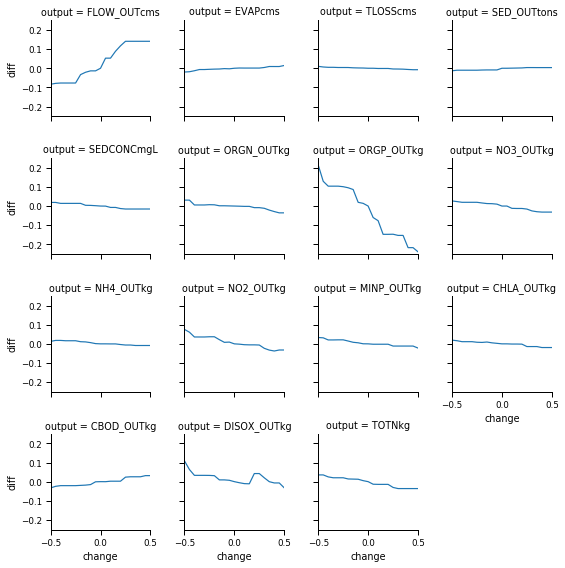

In [25]:
g = sns.FacetGrid(df, col="output", col_wrap=4, height=2, ylim=(-0.25, 0.25),xlim=(-0.5,0.5))
g.map(sns.lineplot, "change", "diff", ci=None);

In [26]:
type(g)

seaborn.axisgrid.FacetGrid

In [31]:
g.set(ylabel="Predicted Change (%)", xlabel="Change in Forest Cover (%)")

In [32]:
g.savefig('results/predictions_forest_facetgrid.png')